1
[0, 0, [0, 0, [0, 0, 0]]]
2
[0, [0, 0, 0], [0, 0, 0]]
[0, 0, [0, [0, 0, 0], 0]]
2
[0, [0, 0, 0], [0, 0, 0]]
[0, 0, [0, [0, 0, 0], 0]]
12
True


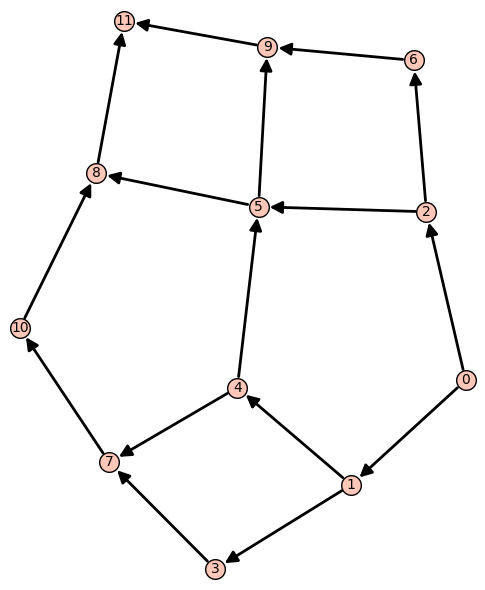

r [[0, 2], [0, 3], [0, 4]] res [2, 3, 4]
r [[0, 1], [[[2, 3, 4]], 4], [0, 5]] res [1, 4, 5]
[[1, 4, 5], [2, 3, 4]]
[[0, 0, 1, 1, 7, 10], [0, 1, 1, 1, 7, 10], [0, 1, 2, 2, 6, 10], [0, 1, 2, 2, 7, 9]]
[[0, 0, 1, 1, 7], [0, 1, 1, 1, 7], [0, 1, 2, 2, 6]]
[[0, [0, 0, 0], 0], 0, 0]
[[0, [0, 0, 0], [0, [0, 0, 0], 0]], 0, 0]
[0, [[0, 0, 0], 0, 0], 0]
[[0, [0, 0, 0], 0], 0, 0]
[0, 1, 3, 5, 8, 10]  ->  [0, 1, 1, 3, 5, 10] i 4 p 3 ecart [1, 2, 2, 3, 2, 0] 3
[0, 1, 3, 4, 8, 10]  ->  [0, 1, 1, 3, 4, 10] i 4 p 3 ecart [1, 2, 1, 4, 2, 0] 4
[0, 1, 2, 5, 8, 10]  ->  [0, 1, 1, 2, 5, 10] i 4 p 3 ecart [1, 1, 3, 3, 2, 0] 3
[0, 1, 2, 4, 8, 10]  ->  [0, 1, 1, 2, 4, 10] i 4 p 3 ecart [1, 1, 2, 4, 2, 0] 4
[0, 2, 3, 5, 7, 10]  ->  [0, 2, 3, 3, 5, 7] i 5 p 3 ecart [2, 1, 2, 2, 3, 0] 3
[0, 2, 3, 5, 6, 10]  ->  [0, 2, 3, 3, 5, 6] i 5 p 3 ecart [2, 1, 2, 1, 4, 0] 4
[0, 1, 2, 3, 8, 10]  ->  [0, 1, 1, 2, 3, 10] i 4 p 3 ecart [1, 1, 1, 5, 2, 0] 5
[0, 2, 3, 4, 7, 10]  ->  [0, 2, 3, 3, 4, 7] i 5 p 3 ecart [2, 1, 1, 3, 

NameError: name 'generate_all_rotations' is not defined

In [1]:
%run dyck_path.ipynb

In [45]:
import matplotlib 
import itertools
from sympy.utilities.iterables import multiset_permutations

from copy import deepcopy
from string import ascii_lowercase

In [51]:
import matplotlib.pyplot as plt
import numpy as np


def word_to_path(word):
    
    coords = [(0,0)]
    
    for char in word[1:]:
        
        oldX,oldY = coords[-1]
        
        coords.append((oldX, oldY+1))
        
        for i in range(0,char - oldX):
            
            oldX,oldY = coords[-1]
            
            newX = oldX + 1
            coords.append((newX, oldY))
        
        newY = oldY + 1
        
    
    #final steps: one up and keep going until you reach 2n
    oldX,oldY = coords[-1]
    coords.append((oldX, oldY+1))
    
    oldX,oldY = coords[-1]
    
    bound = deepcopy(2*(oldY) - oldX)
    
    for i in range(0, bound):

        oldX, oldY = coords[-1]
        coords.append((oldX+1, oldY))

    return coords

def visualise_word(words, draw_diagonal=False):

    
    if len(words) == 1:
        
        word = words[0]
        x,y = zip(*word_to_path(word))
        plt.plot(x,y,'o-r')
        
    else:
    
        nrows = int(np.ceil(len(words)/2))
        ncols = 2
        
        if nrows == 1:
            nrows += 1

        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, sharey=False,figsize=(18, 16))

        hcounter = 0
        vcounter = 0
        for word in words: 
                    
            x,y = zip(*word_to_path(word))

            axes[vcounter][hcounter].plot(x,y,'o-r')

            if draw_diagonal:
                x = np.linspace(0,x[-1])
                poly = np.poly1d([0.5,0])
                y = poly(x)
                axes[vcounter][hcounter].plot(x,y,'--',scalex=False, scaley=False)

            hcounter = (hcounter + 1) % 2
            vcounter = (vcounter + 1) if hcounter == 0 else vcounter
        
word1 = [0,0,1,3,4]
word2 = [0,0,1,4,5]
words = [word1 , word2, word1]
visualise_word(words,draw_diagonal=True)

In [47]:
list(zip(*word_to_path(word)))

NameError: name 'word' is not defined

In [48]:
from numpy import ones,vstack
from numpy.linalg import lstsq

n = 30
points = [(0,0),(2*n,n)]
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("Line Solution is y = {m}x + {c}".format(m=m,c=c))

Line Solution is y = 0.5x + 7.0798525355e-20


In [49]:
print(np.poly1d([0.5,0]))

 
0.5 x


In [50]:
from functools import reduce 
from itertools import permutations

list1 = [0,0,1,2,7,10] 
list2 = [0,0,0,0,7,10]

def how_many_differences(list1, list2):
    differences = []
    for perm1 in list(permutations(list1)):
        for perm2 in list(permutations(list2)):
            differences.append(list(map(lambda x: x[0] != x[1], zip(perm1,perm2))).count(True))
    
    return min(differences)

In [7]:
list1 = [0,0,1,2,7,10] 
list2 = [0,0,0,0,7,10]

how_many_differences(list1, list2)

2

In [8]:
lista = [[0, 2, 4, 6, 8, 10],
 [0, 1, 4, 6, 8, 10],
 [0, 2, 4, 6, 8, 10],
 [0, 2, 3, 6, 8, 10],
 [0, 2, 4, 6, 8, 10],
 [0, 2, 4, 5, 8, 10],
 [0, 2, 4, 6, 8, 10],
 [0, 2, 4, 6, 7, 10],
 [0, 2, 4, 6, 8, 10],
 [0, 2, 4, 6, 8, 9],
 [0, 1, 4, 6, 8, 10],
 [0, 0, 4, 6, 8, 10],
 [0, 1, 4, 6, 8, 10],
 [0, 1, 1, 6, 8, 10],
 [0, 1, 4, 6, 8, 10],
 [0, 1, 4, 5, 8, 10],
 [0, 1, 4, 6, 8, 10],
 [0, 1, 4, 6, 7, 10],
 [0, 1, 4, 6, 8, 10],
 [0, 1, 4, 6, 8, 9],
 [0, 2, 3, 6, 8, 10],
 [0, 1, 3, 6, 8, 10],
 [0, 2, 3, 6, 8, 10],
 [0, 2, 2, 6, 8, 10],
 [0, 2, 3, 6, 8, 10],
 [0, 2, 3, 3, 8, 10],
 [0, 2, 3, 6, 8, 10],
 [0, 2, 3, 6, 7, 10],
 [0, 2, 3, 6, 8, 10],
 [0, 2, 3, 6, 8, 9]]

In [9]:
visualise_word(lista[:10],draw_diagonal=True)

In [10]:
visualise_word(lista[10:20],draw_diagonal=True)

In [11]:
word1 = [0,1,2,4,8,8]
word2 = [0,1,1,2,4,8]

visualise_word([word1, word2], draw_diagonal=True)

In [12]:
def rotate_word(word,indexToRotate,m):
    
    if indexToRotate < 1:
        return "WRONG"
    
    newWord = deepcopy(word)
    difference = word[indexToRotate] - word[indexToRotate-1]  
    
    if difference == 0 or ((difference > m) and word[indexToRotate-1] == word[indexToRotate-2]):
        return None
    
    elif difference <= m and difference > 0:
        newWord[indexToRotate] -= 1
        
    elif difference > m:
        counter = difference
        
        nextIndex = deepcopy(indexToRotate) - 2
        
        howManyTimes = 2
        
        while nextIndex >= 0:
                        
            newDifference = word[nextIndex+1] - word[nextIndex]
            counter += newDifference
            
            if counter < howManyTimes * m + 1:
                break
            
            nextIndex = nextIndex - 1
            howManyTimes += 1
            
            
        thing = newWord.pop(indexToRotate)
        newWord.insert(nextIndex+1, word[nextIndex+1])
    
    else:
        print("problem")
    
    return newWord

def generate_all_rotations(word,m):
    
    allRotations = []
    
    for index in range(1, len(word)-2):
            
        generatedWord = rotate_word(word, index, m)

        if generatedWord != None:
            allRotations.append(generatedWord)
        
    return allRotations

In [13]:
rotate_word([0,0,3,6,8,10],3,2)

[0, 0, 0, 3, 8, 10]

In [14]:
rotate_word([1,3,5,8,9],3,2)

[1, 1, 3, 5, 9]

In [15]:
rotate_word([0,0,2,3,7,7],4,2)

[0, 0, 0, 2, 3, 7]

In [17]:
generate_all_rotations([2,4,6,8],2)

[[2, 3, 6, 8]]

In [18]:
rotate_word([2,4,6,8],1,2)

[2, 3, 6, 8]

In [19]:
from sage.combinat.posets.posets import FinitePoset
def poset_dyck(n,d,typ):
    y=generer_tout_dyck(n,d,typ)
    l=y[1]
    P = FinitePoset(DiGraph(dict([[i,l[i]] for i in range(len(l))])), facade=False)
    #return [y[0],P.relations()]
    return P, y[0]

from sage.combinat.posets.posets import FinitePoset
def poset_tree(n,typ,dire,d):
    y=generer_toutes_expressions(n,typ,dire,d)
    l=y[1]
    P = FinitePoset(DiGraph(dict([[i,l[i]] for i in range(len(l))])), facade=False)
    #return [y[0],P.relations()]
    return P, y[0]

In [20]:
P,y = poset_dyck(4,2,0)
P.is_lattice()

True

In [21]:
import functools 

def lower_bound(a,b,P):
    lower_bounds = []
    for element in P:
        if P.is_lequal(element,a) and P.is_lequal(element,b):
            lower_bounds.append(element)
    
    return lower_bounds

def compute_pseudocomplements(P):
    pseudoComplement = {}
    for el1 in P:
        lowerBoundIsZero = []

        for el2 in P:
            if lower_bound(el1,el2,P) == [P[0]]:
                lowerBoundIsZero.append(el2)
                
        lowerBoundIsZero.sort(reverse=True)
        pseudoComplementOfEl1 = lowerBoundIsZero[0] #if len(lowerBoundIsZero) > 1 else lowerBoundIsZero[0]
        #print(el1,lowerBoundIsZero)
        pseudoComplement[el1] = pseudoComplementOfEl1

    return pseudoComplement

In [68]:
P,y  = poset_tree(9,1,0,3)
P.is_meet_semilattice(certificate=True)
cmp = functools.cmp_to_key(P.is_lequal) #redefine the comparison using the new pose

In [69]:
pseudocompls = compute_pseudocomplements(P)
print(pseudocompls)
len(P)  == len(pseudocompls)

{0: 50, 1: 52, 2: 42, 3: 25, 4: 52, 5: 54, 6: 34, 7: 42, 8: 42, 9: 4, 10: 25, 11: 25, 12: 54, 13: 34, 14: 54, 15: 0, 16: 0, 17: 34, 18: 4, 19: 42, 20: 4, 21: 4, 22: 4, 23: 25, 24: 25, 25: 54, 26: 0, 27: 34, 28: 34, 29: 0, 30: 0, 31: 0, 32: 4, 33: 4, 34: 42, 35: 4, 36: 4, 37: 4, 38: 25, 39: 25, 40: 0, 41: 0, 42: 34, 43: 0, 44: 0, 45: 4, 46: 4, 47: 4, 48: 4, 49: 25, 50: 0, 51: 0, 52: 4, 53: 4, 54: 25}


True

{0: 50, 1: 52, 2: 42, 3: 25, 4: 52, 5: 54, 6: 34, 7: 42, 8: 42, 9: 4, 10: 25, 11: 25, 12: 54, 13: 34, 14: 54, 15: 0, 16: 0, 17: 34, 18: 4, 19: 42, 20: 4, 21: 4, 22: 4, 23: 25, 24: 25, 25: 54, 26: 0, 27: 34, 28: 34, 29: 0, 30: 0, 31: 0, 32: 4, 33: 4, 34: 42, 35: 4, 36: 4, 37: 4, 38: 25, 39: 25, 40: 0, 41: 0, 42: 34, 43: 0, 44: 0, 45: 4, 46: 4, 47: 4, 48: 4, 49: 25, 50: 0, 51: 0, 52: 4, 53: 4, 54: 25}


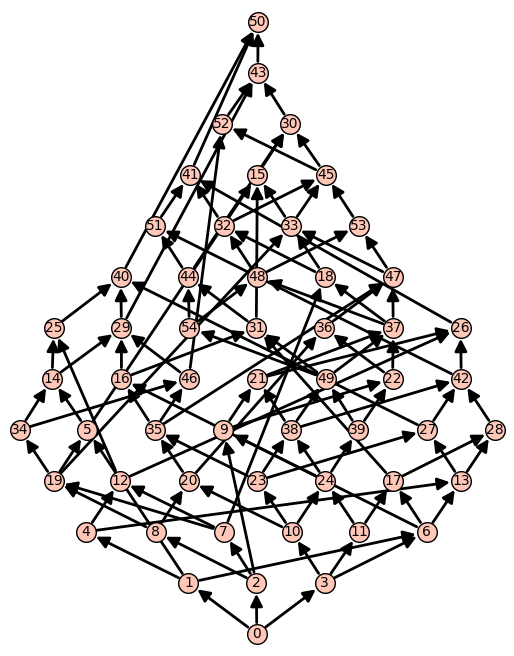

In [70]:
print(pseudocompls)
P.show(figsize=10)

#P[0] > P[10], P.is_gequal(P[0],P[10]) #note that 0 > 10 in the poset! this is what we want

In [71]:
# for key in pseudocompls:
#     thing = int(str(pseudocompls[key]))
#     if not (thing in [0,1,2]):
#         print('error',thing)

In [72]:
#pseudocompls = compute_pseudocomplements(P)

things_to_draw = []
for key in pseudocompls:
    a = key
    astar = pseudocompls[key]
    
    indexA = int(str(a))
    indexAStar = int(str(astar))
    
    #print(y[indexA], y[indexAStar])
    
    things_to_draw.append(arbre_a_dyck(y[indexA]))
    things_to_draw.append(arbre_a_dyck(y[indexAStar]))

In [73]:
visualise_word(things_to_draw[:10], draw_diagonal=True)

In [74]:
visualise_word([arbre_a_dyck(y[0])])

In [75]:
pseudocompls = compute_pseudocomplements(P)

things_to_draw = []
s=set()
for key in pseudocompls:
    a = key
    astar = pseudocompls[key]
    
    indexA = int(str(a))
    indexAStar = int(str(astar))
    s.add(indexAStar)
    #print(y[indexA], y[indexAStar])
#     print indexA,indexAStar
    print(arbre_a_dyck(y[indexA]),arbre_a_dyck(y[indexAStar]))
print s


([0, 2, 4, 6], [0, 0, 0, 0])
([0, 1, 4, 6], [0, 0, 0, 2])
([0, 2, 3, 6], [0, 0, 3, 4])
([0, 2, 4, 5], [0, 0, 0, 6])
([0, 0, 4, 6], [0, 0, 0, 2])
([0, 1, 1, 6], [0, 0, 2, 4])
([0, 1, 4, 5], [0, 0, 2, 6])
([0, 1, 3, 6], [0, 0, 3, 4])
([0, 2, 2, 6], [0, 0, 3, 4])
([0, 2, 3, 3], [0, 0, 4, 6])
([0, 2, 3, 5], [0, 0, 0, 6])
([0, 2, 4, 4], [0, 0, 0, 6])
([0, 0, 3, 6], [0, 0, 2, 4])
([0, 0, 4, 5], [0, 0, 2, 6])
([0, 0, 1, 6], [0, 0, 2, 4])
([0, 1, 1, 1], [0, 2, 4, 6])
([0, 1, 1, 5], [0, 2, 4, 6])
([0, 1, 4, 4], [0, 0, 2, 6])
([0, 1, 1, 3], [0, 0, 4, 6])
([0, 1, 2, 6], [0, 0, 3, 4])
([0, 2, 2, 5], [0, 0, 4, 6])
([0, 1, 3, 3], [0, 0, 4, 6])
([0, 2, 2, 3], [0, 0, 4, 6])
([0, 1, 3, 5], [0, 0, 0, 6])
([0, 2, 3, 4], [0, 0, 0, 6])
([0, 0, 0, 6], [0, 0, 2, 4])
([0, 0, 3, 3], [0, 2, 4, 6])
([0, 0, 3, 5], [0, 0, 2, 6])
([0, 0, 4, 4], [0, 0, 2, 6])
([0, 0, 1, 5], [0, 2, 4, 6])
([0, 0, 1, 1], [0, 2, 4, 6])
([0, 1, 1, 4], [0, 2, 4, 6])
([0, 0, 1, 3], [0, 0, 4, 6])
([0, 1, 1, 2], [0, 0, 4, 6])
([0, 0, 2, 6],

In [30]:
def list_to_tree(lista, tree = Graph(), last_parent = 0):
    
    for item in lista:
        if item == 0:
            newV = tree.add_vertex()
            tree.add_edge(last_parent, newV)
        else:
            newV = tree.add_vertex()
            tree.add_edge(last_parent, newV)
            list_to_tree(item, tree, newV)
            
    return tree

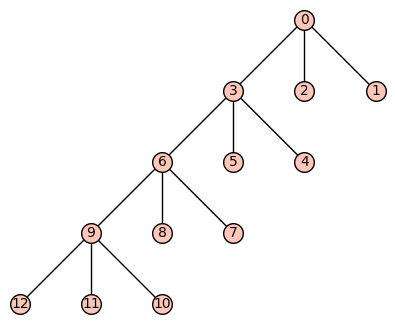

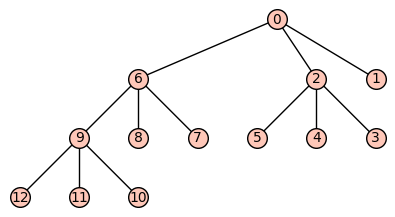

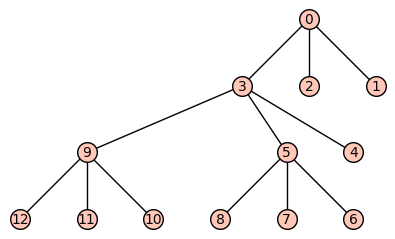

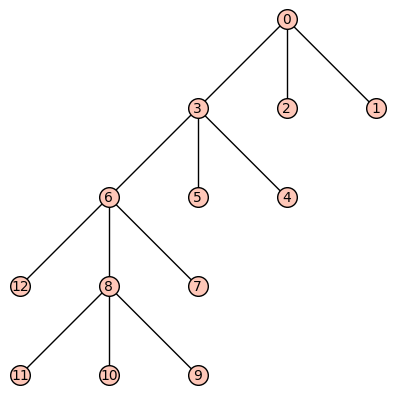

In [31]:
newTree=Graph()
newTree.add_vertex()
list_to_tree(y[0], tree=newTree).show(layout='tree',tree_root=0)

newTree=Graph()
newTree.add_vertex()
list_to_tree(y[1], tree=newTree).show(layout='tree',tree_root=0)

newTree=Graph()
newTree.add_vertex()
list_to_tree(y[2], tree=newTree).show(layout='tree',tree_root=0)

newTree=Graph()
newTree.add_vertex()
list_to_tree(y[3], tree=newTree).show(layout='tree',tree_root=0)

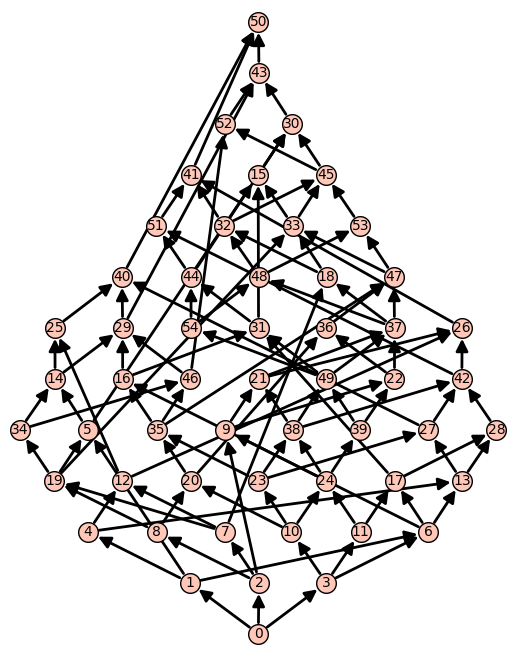

In [32]:
P.plot(figsize=10)

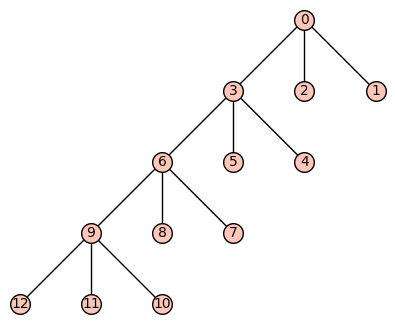

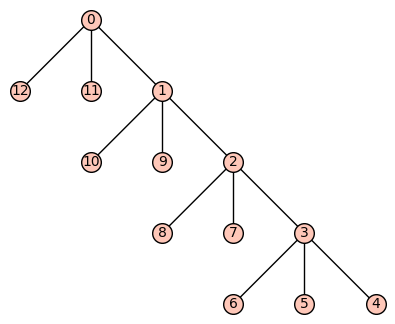

-------


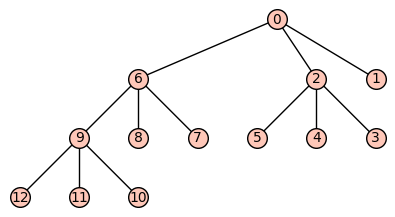

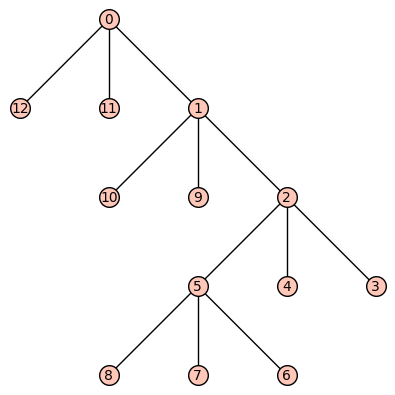

-------


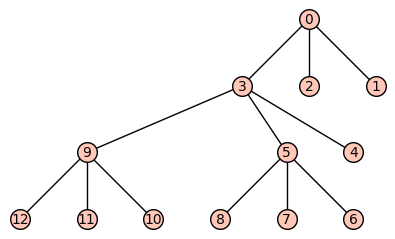

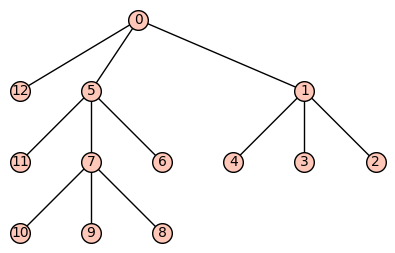

-------


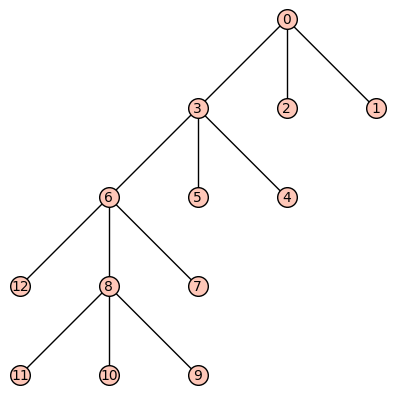

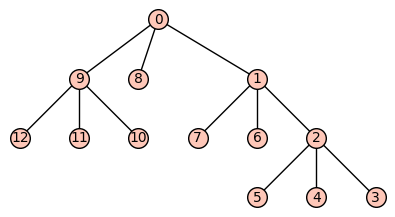

-------


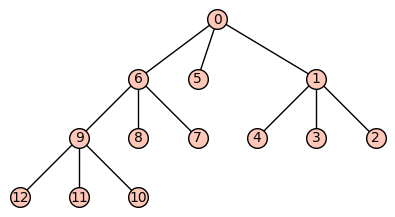

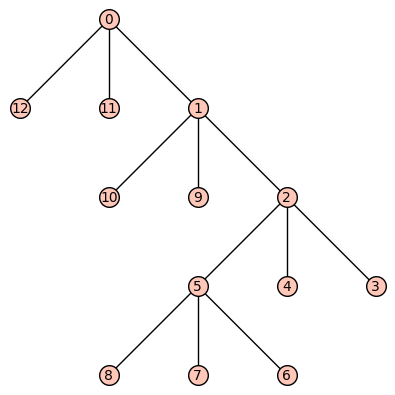

-------


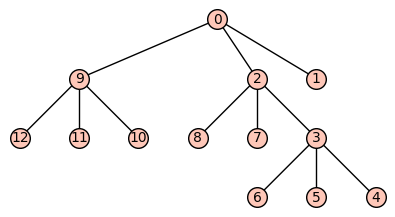

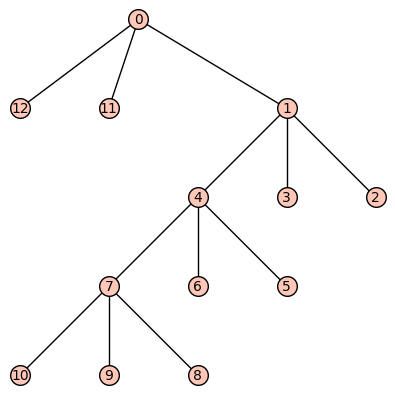

-------


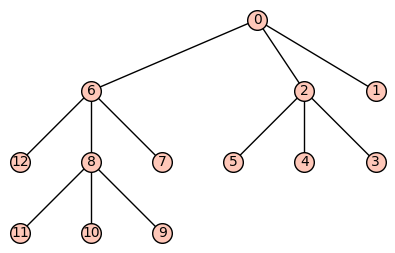

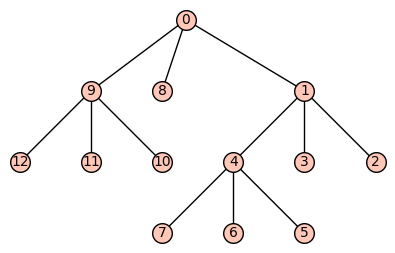

-------


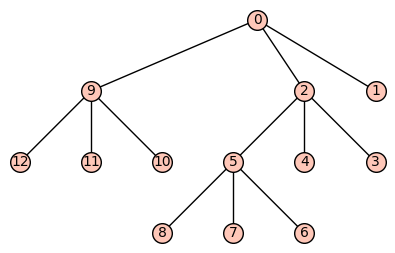

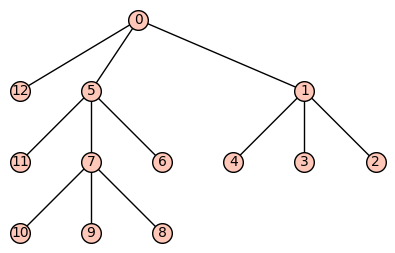

-------


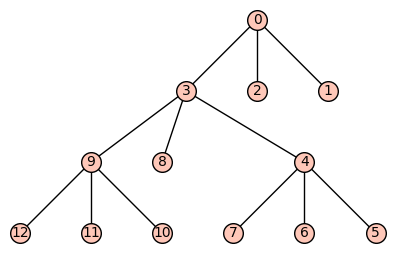

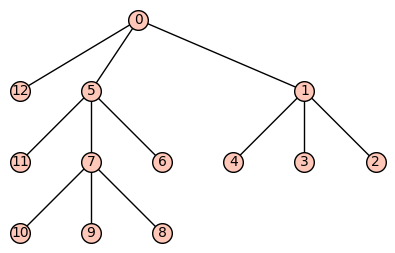

-------


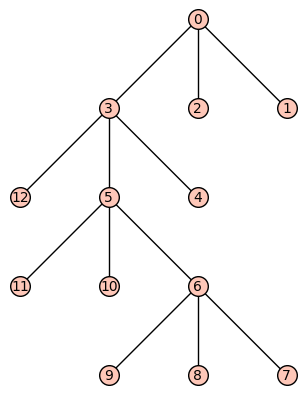

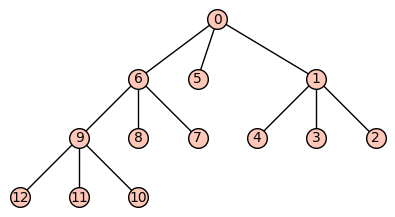

-------


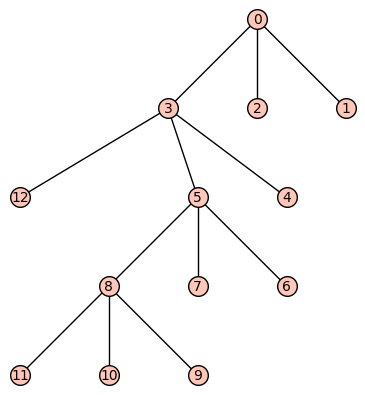

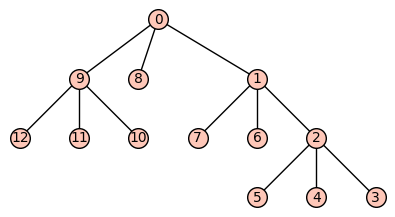

-------


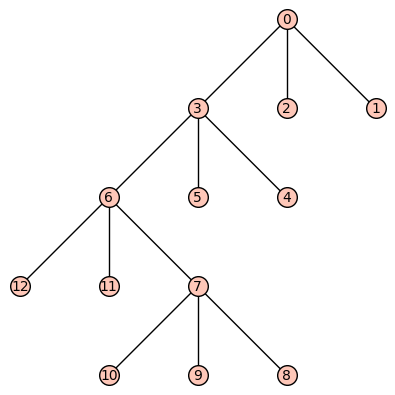

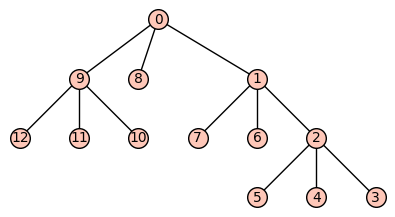

-------


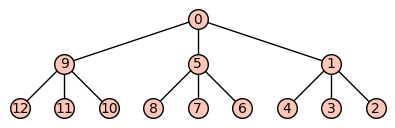

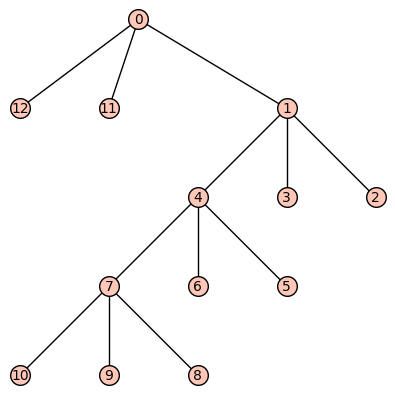

-------


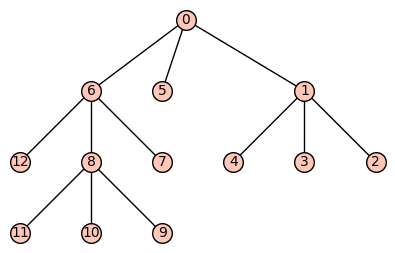

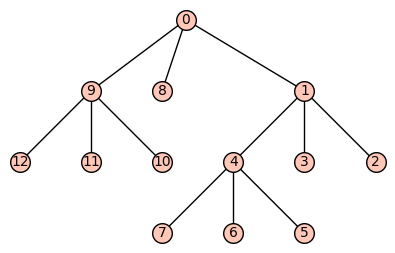

-------


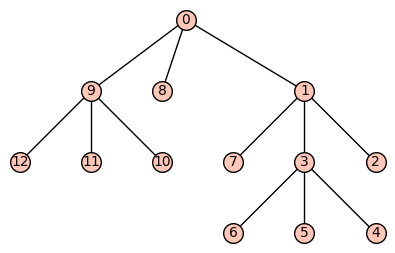

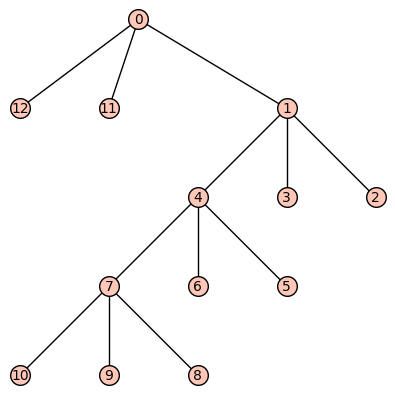

-------


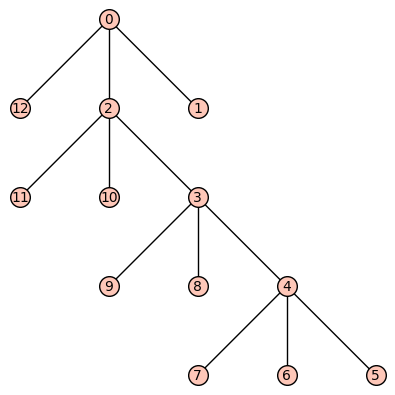

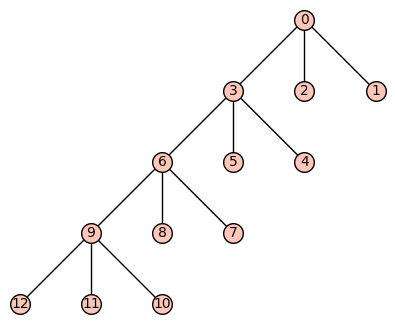

-------


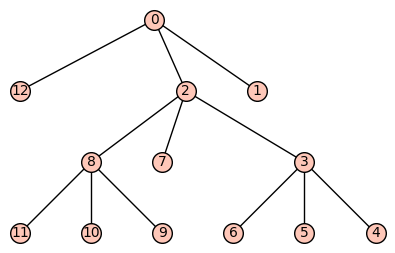

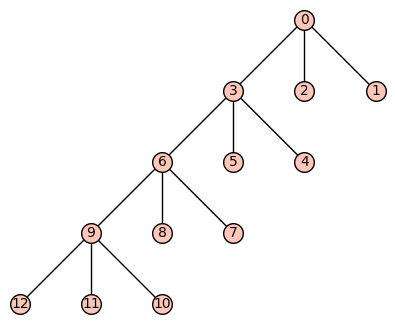

-------


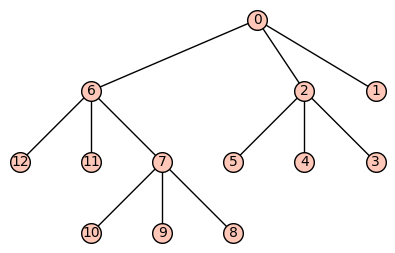

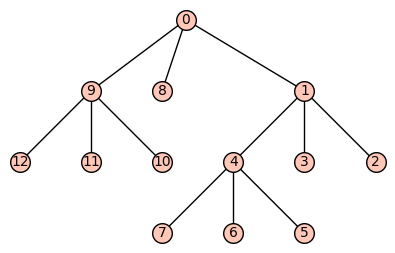

-------


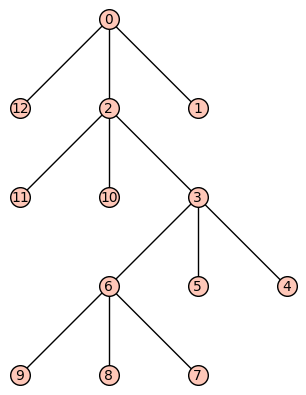

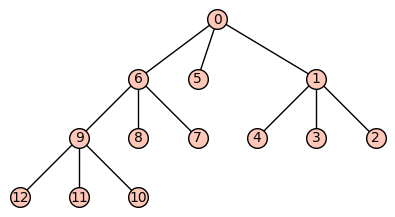

-------


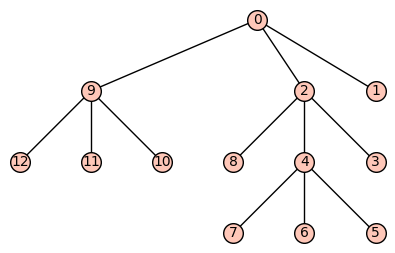

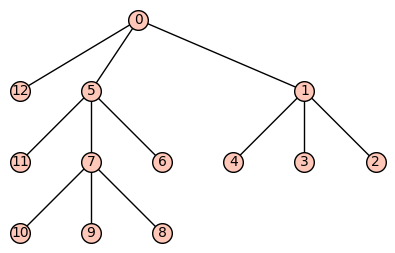

-------


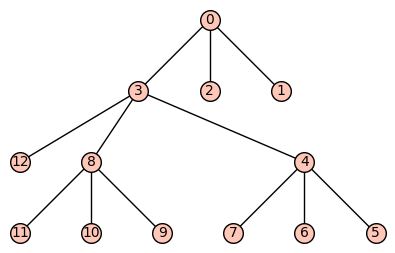

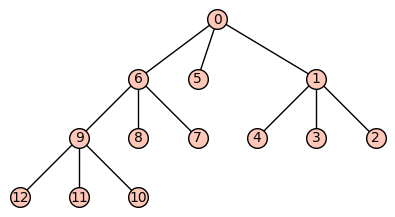

-------


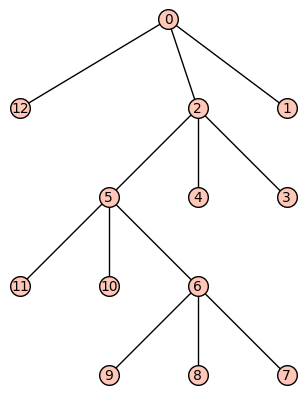

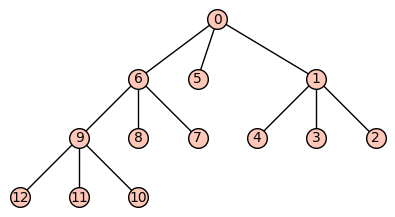

-------


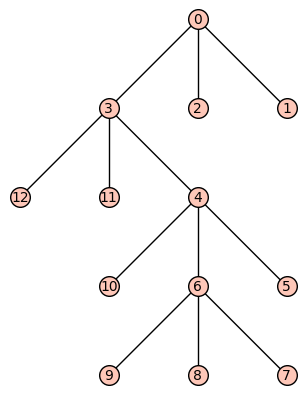

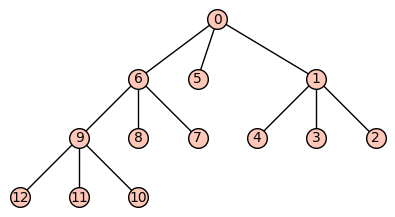

-------


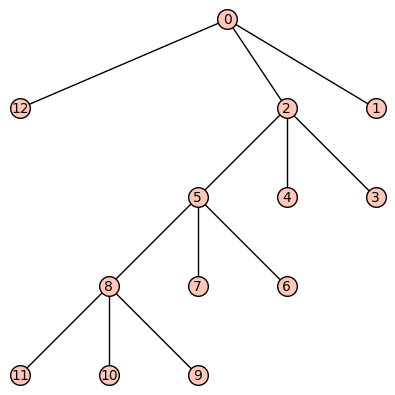

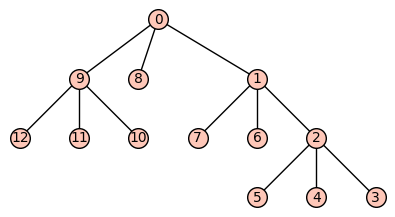

-------


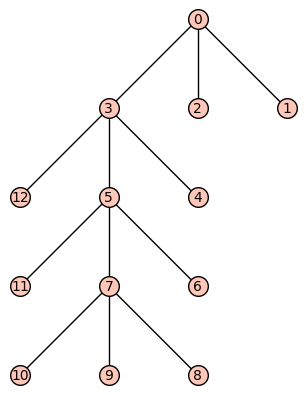

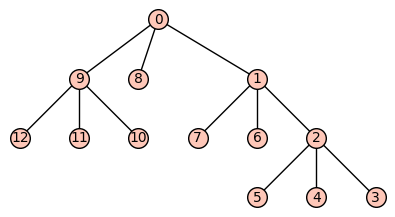

-------


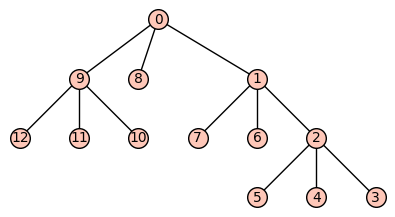

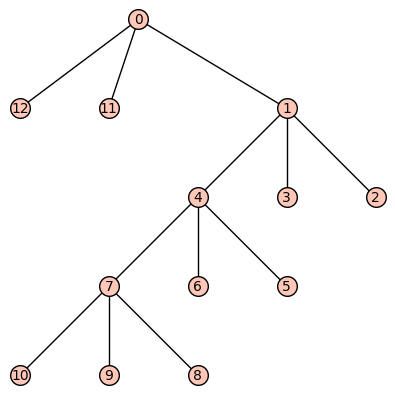

-------


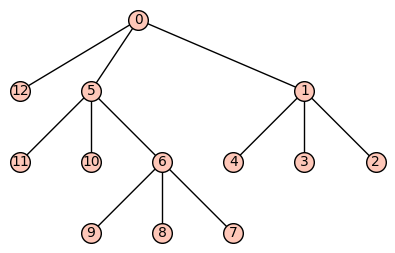

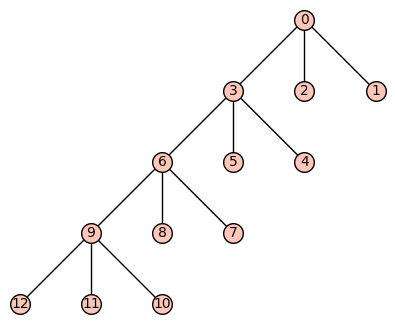

-------


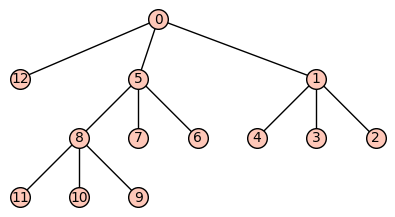

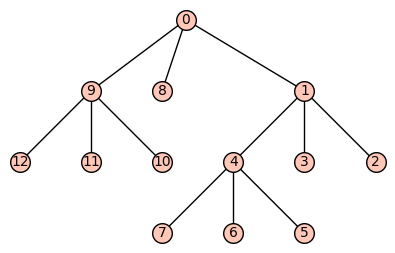

-------


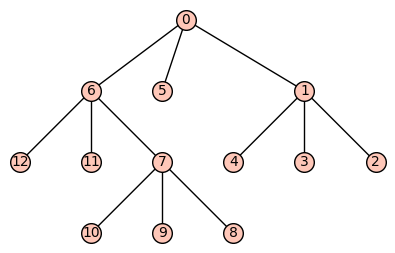

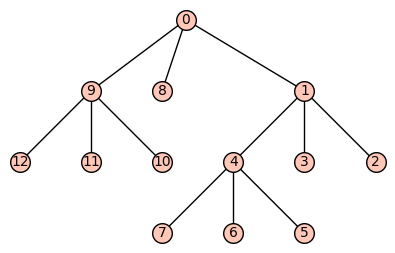

-------


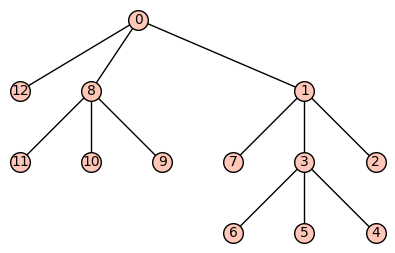

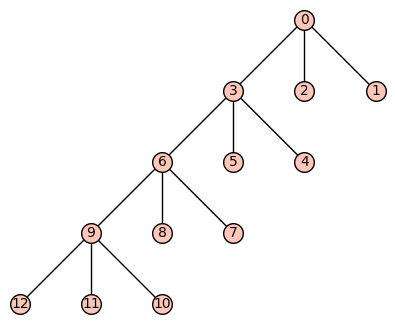

-------


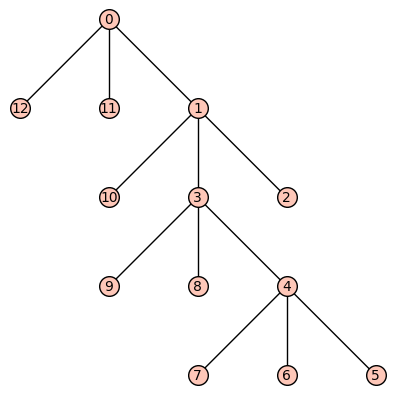

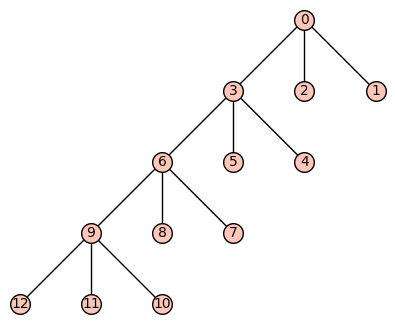

-------


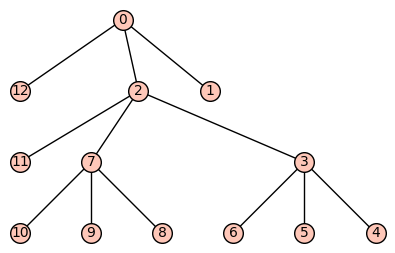

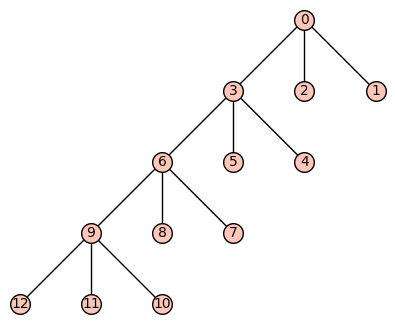

-------


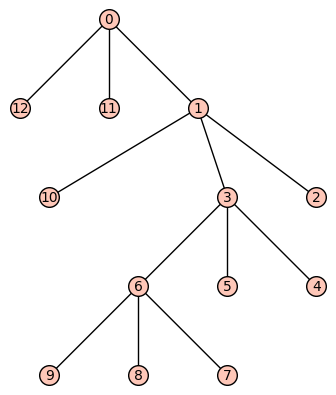

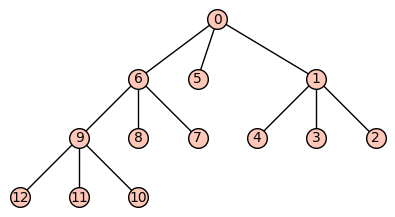

-------


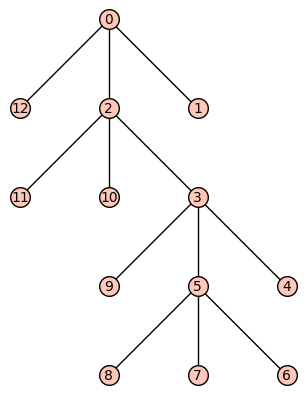

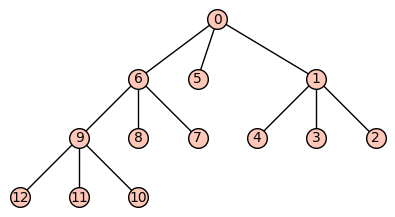

-------


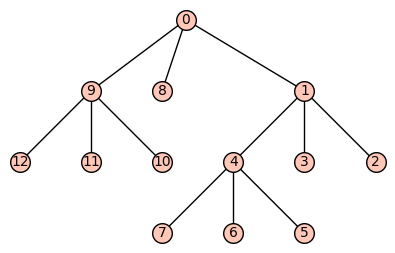

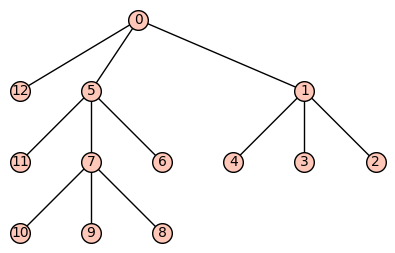

-------


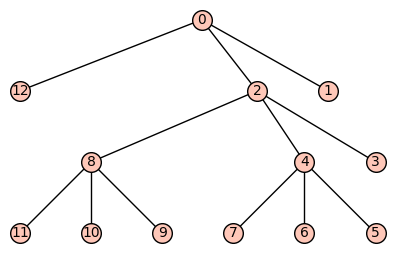

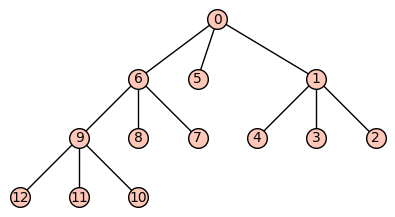

-------


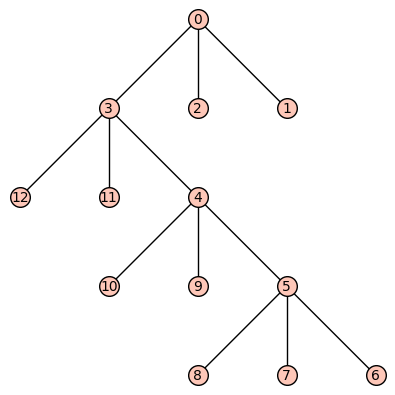

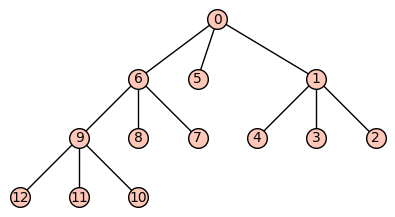

-------


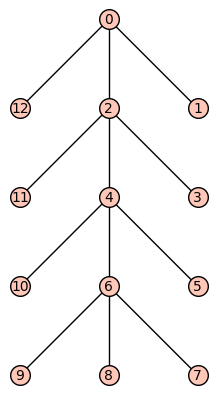

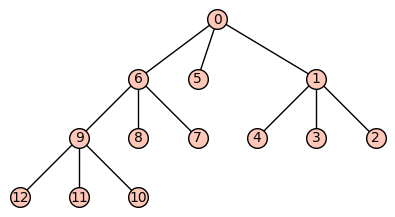

-------


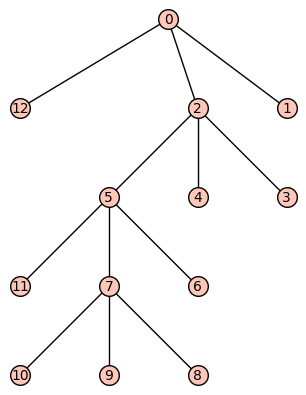

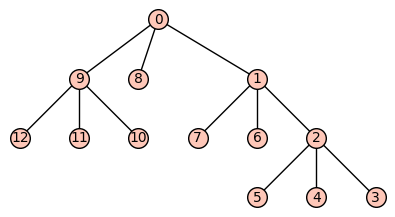

-------


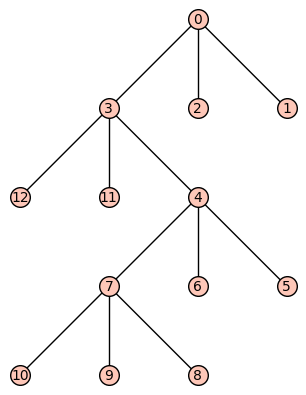

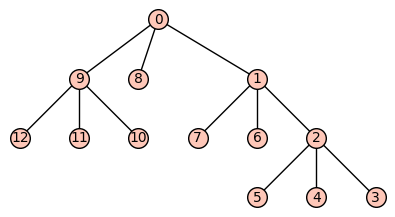

-------


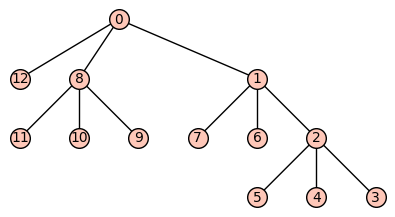

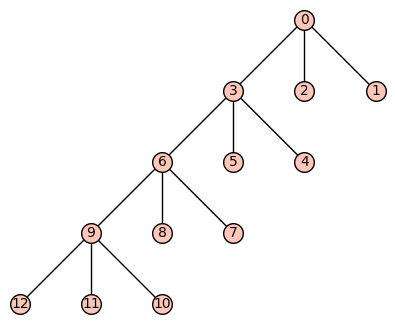

-------


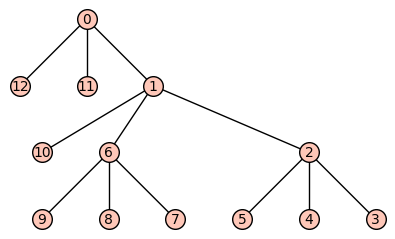

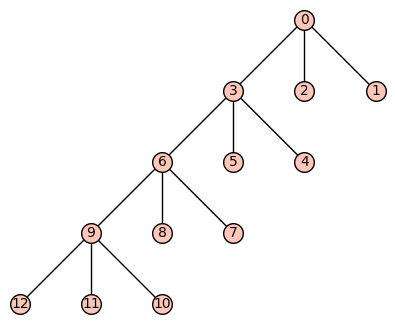

-------


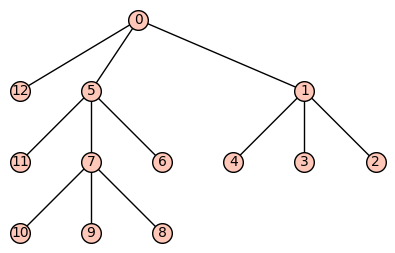

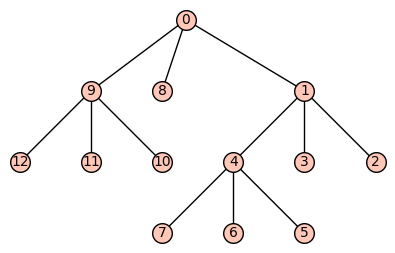

-------


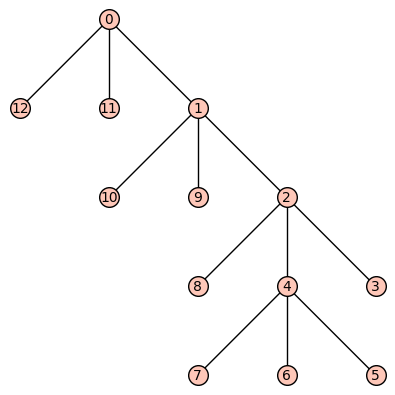

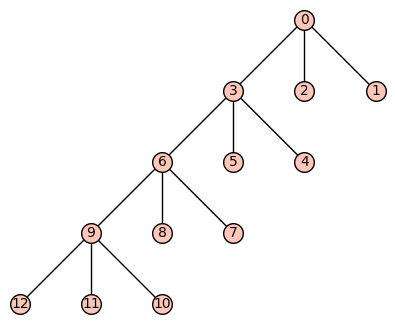

-------


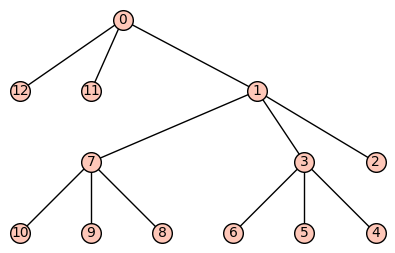

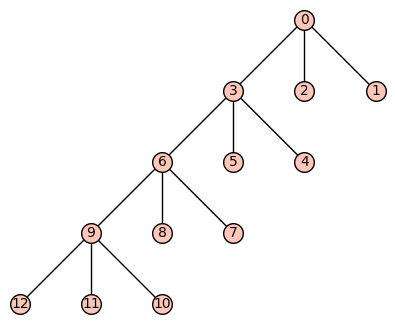

-------


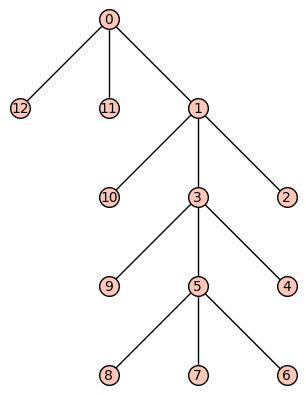

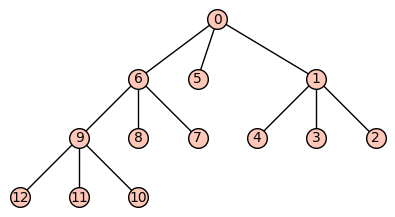

-------


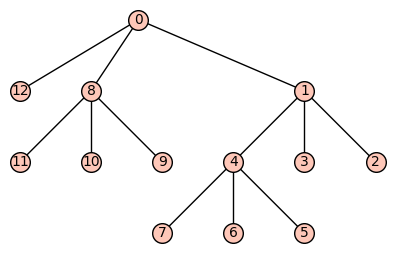

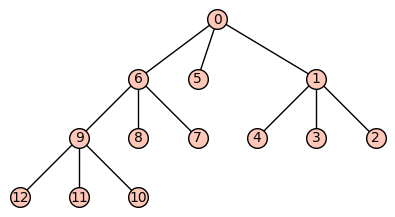

-------


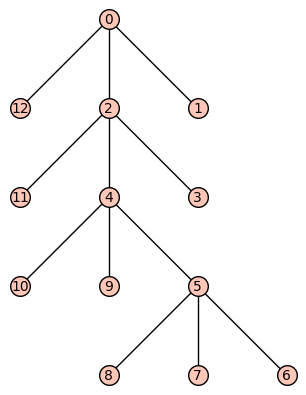

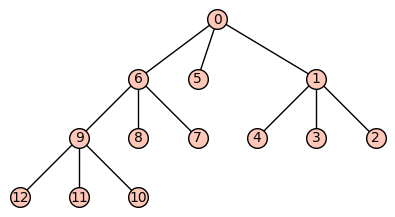

-------


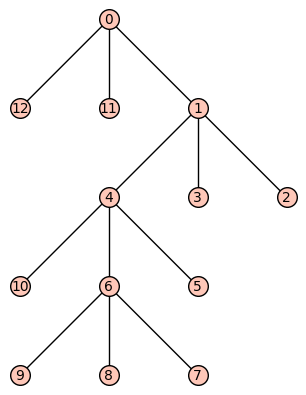

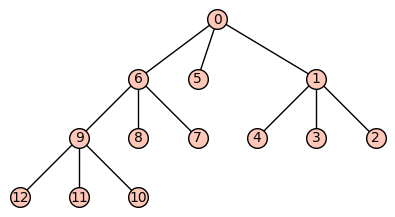

-------


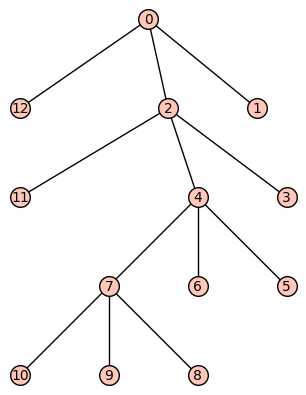

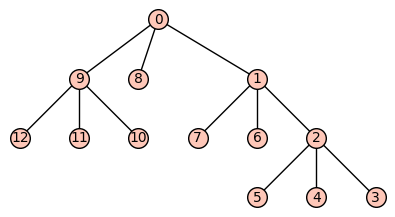

-------


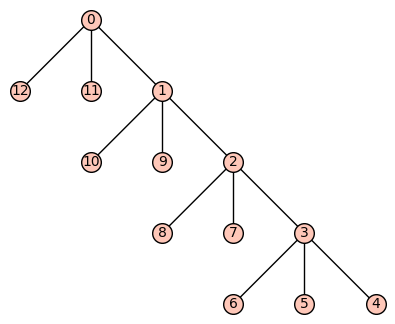

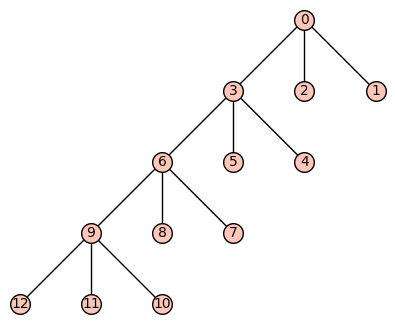

-------


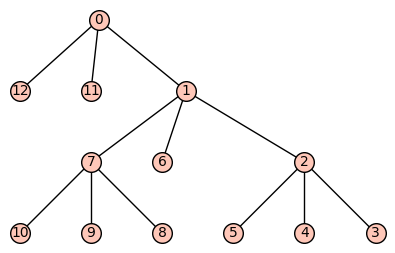

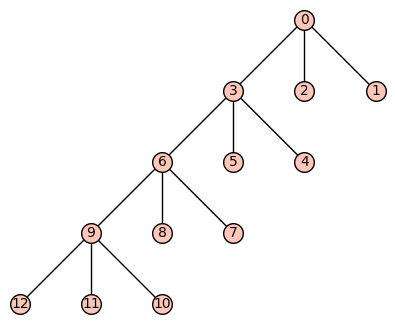

-------


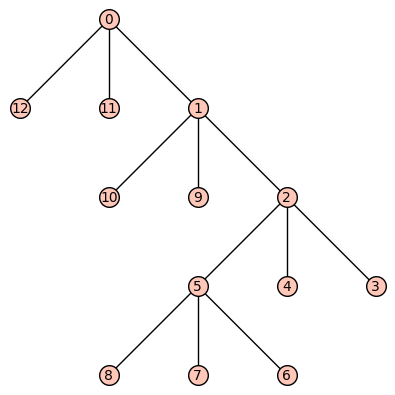

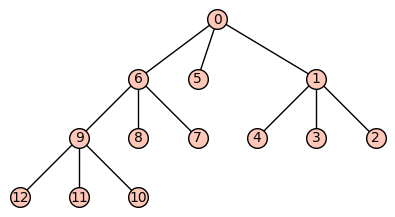

-------


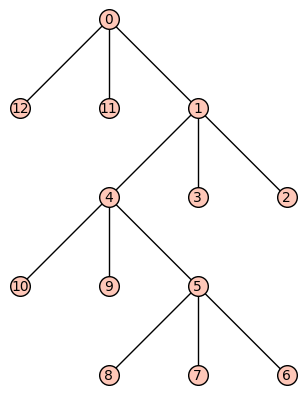

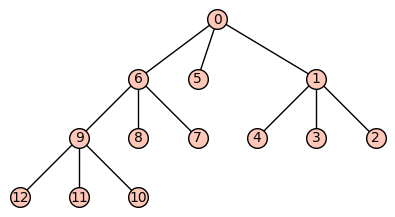

-------


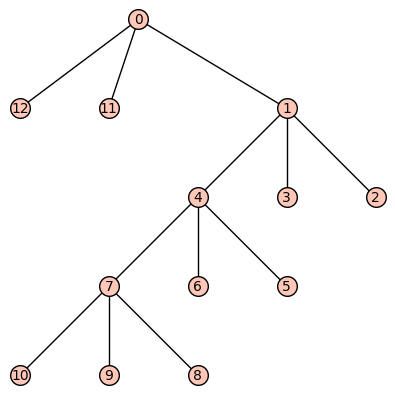

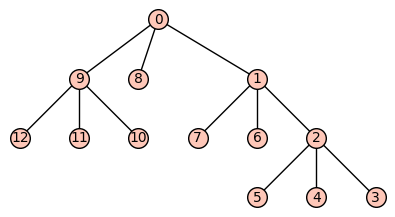

-------


In [33]:
things_to_draw = []
for key in pseudocompls:
    a = key
    astar = pseudocompls[key]
    
    indexA = int(str(a))
    indexAStar = int(str(astar))
    
    #print(y[indexA], y[indexAStar])
    
    newTree=Graph()
    newTree.add_vertex()
    list_to_tree(y[indexA], tree=newTree).show(layout='tree',tree_root=0)

    newTree=Graph()
    newTree.add_vertex()
    list_to_tree(y[indexAStar], tree=newTree).show(layout='tree',tree_root=0)

    print("-------")

In [34]:
P

Finite poset containing 55 elements (use the .plot() method to plot)

In [35]:
pseudocompls

{0: 50,
 1: 52,
 2: 42,
 3: 25,
 4: 52,
 5: 54,
 6: 34,
 7: 42,
 8: 42,
 10: 25,
 11: 25,
 9: 4,
 12: 54,
 13: 34,
 19: 42,
 14: 54,
 16: 0,
 17: 34,
 24: 25,
 38: 25,
 18: 4,
 20: 4,
 23: 25,
 21: 4,
 22: 4,
 15: 0,
 25: 54,
 27: 34,
 28: 34,
 26: 0,
 29: 0,
 39: 25,
 31: 0,
 32: 4,
 35: 4,
 36: 4,
 49: 25,
 37: 4,
 33: 4,
 30: 0,
 34: 42,
 40: 0,
 42: 34,
 44: 0,
 41: 0,
 47: 4,
 54: 25,
 48: 4,
 53: 4,
 45: 4,
 46: 4,
 52: 4,
 43: 0,
 51: 0,
 50: 0}